### Student ID: 2329254
### Student Name: Rojan Dhungel
### Worksheet 1 of AI and ML

## Exercise 1: Basic Image Processing with Python

### 1. Read and Display an Image

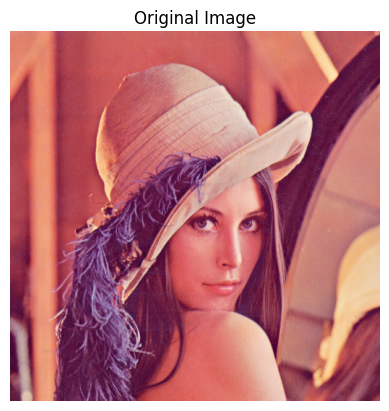

In [105]:
from PIL import Image
import matplotlib.pyplot as plt

# Loaded image
image = Image.open("Lenna.png")
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()


### 2. Display Only the Top Left 100x100 Pixels

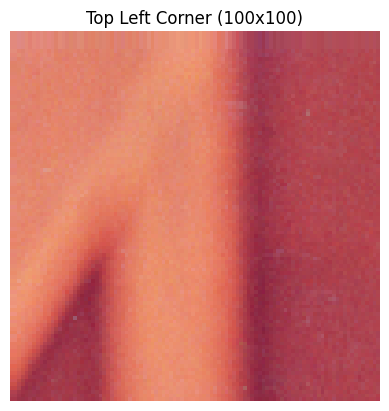

In [106]:
import numpy as np

# Converted image to NumPy array
image_array = np.array(image)

# Extracted top-left 100x100 pixels
top_left = image_array[:100, :100]

# Displayed the extracted section
plt.imshow(top_left)
plt.axis("off")
plt.title("Top Left Corner (100x100)")
plt.show()


### 3. Show the Three Color Channels (R, G, B)

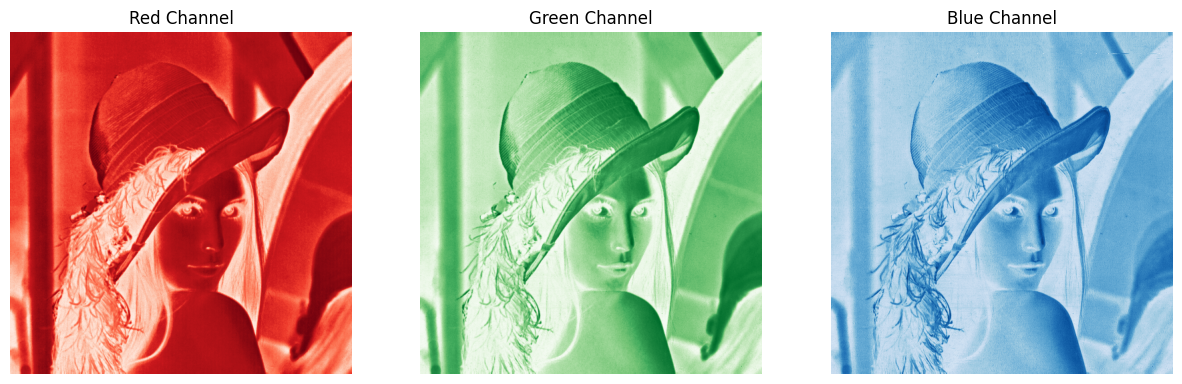

In [107]:
# Extracted RGB channels
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

# Displayed each channel
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(red_channel, cmap="Reds")
axes[0].set_title("Red Channel")
axes[0].axis("off")

axes[1].imshow(green_channel, cmap="Greens")
axes[1].set_title("Green Channel")
axes[1].axis("off")

axes[2].imshow(blue_channel, cmap="Blues")
axes[2].set_title("Blue Channel")
axes[2].axis("off")

plt.show()


### 4. Modify Top 100×100 Pixels to Value 210

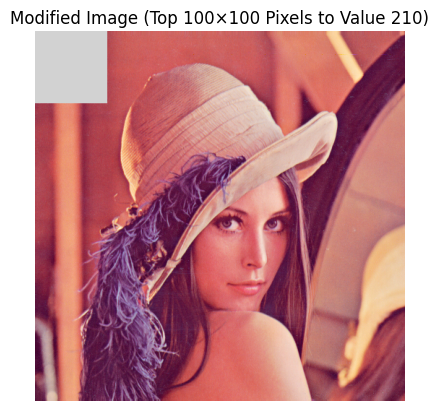

In [108]:
# Modified the top-left 100x100 pixels
modified_image = image_array.copy()
modified_image[:100, :100] = 210  # Light gray

# Displayed the modified image
plt.imshow(modified_image)
plt.title("Modified Image (Top 100×100 Pixels to Value 210)")
plt.axis("off")
plt.show()

## Exercise 2: Grayscale Image Processing

### 1. Load and Display a Grayscale Image

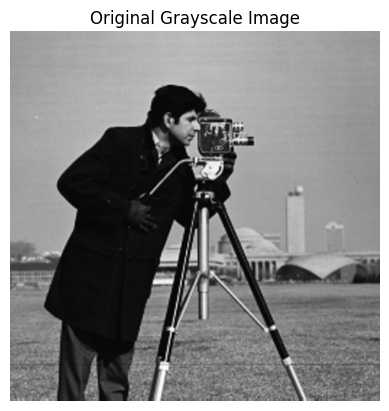

In [109]:
# Converted image to grayscale
from PIL import Image
import matplotlib.pyplot as plt

# Loaded image
gray_image = Image.open("cameraman.png")

gray_image = gray_image.convert("L")

# Displayed grayscale image
plt.imshow(gray_image, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()


### 2. Extract and Display Middle 150-Pixel Section

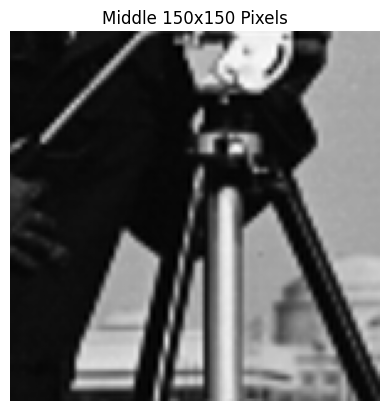

In [110]:
gray_array = np.array(gray_image)
height, width = gray_array.shape

# Computed the center of the image
center_x, center_y = width // 2, height // 2

# Extracted a 150x150 section from the middle
middle_section = gray_array[center_y - 75 : center_y + 75, center_x - 75 : center_x + 75]

# Displayed extracted section
plt.imshow(middle_section, cmap="gray")
plt.title("Middle 150x150 Pixels")
plt.axis("off")
plt.show()


### 3. Apply a Simple Threshold (Binary Image)

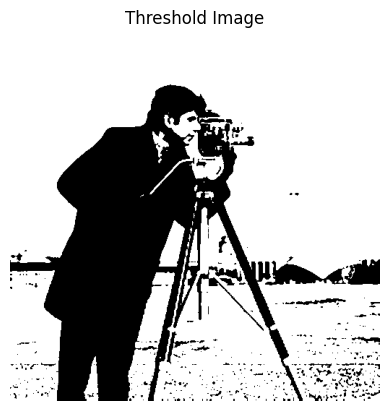

In [111]:
# Applied threshold
binary_image = np.where(gray_array < 100, 0, 255)

# Displayed binary image
plt.imshow(binary_image, cmap="gray")
plt.title("Threshold Image")
plt.axis("off")
plt.show()



### 4. Rotate Image 90 Degrees Clockwise

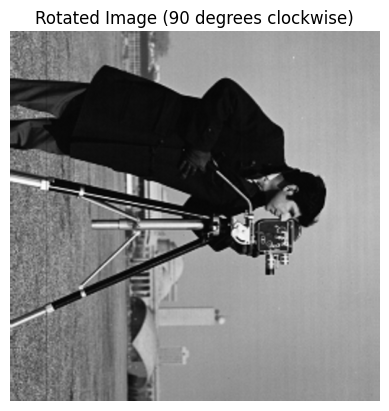

In [112]:
# Rotated image
rotated_image = gray_image.rotate(-90)

# Displayed rotated image
plt.imshow(rotated_image, cmap="gray")
plt.title("Rotated Image (90 degrees clockwise)")
plt.axis("off")
plt.show()


### 5. Convert Grayscale to RGB

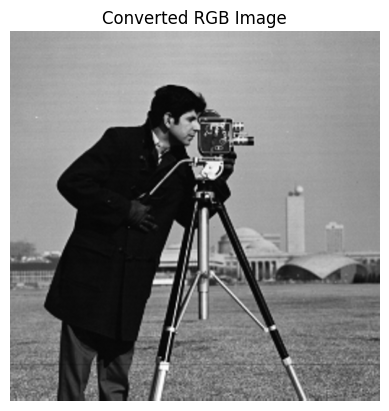

In [113]:
# Converted grayscale to RGB
rgb_image = gray_image.convert("RGB")

# Displayed RGB image
plt.imshow(rgb_image)
plt.title("Converted RGB Image")
plt.axis("off")
plt.show()


## Exercise 3: Image Compression and Decompression with PCA

### 1. Load and Prepare Data

In [114]:
from sklearn.decomposition import PCA

# Loaded the image and ensure it's grayscale
gray_image = Image.open("Lenna.png").convert("L")

# Converted grayscale image to NumPy array
image_array = np.array(gray_image, dtype=np.float32)  # Ensure 2D array

# Checked shape of image array
print("Image Shape:", image_array.shape)  # Should be (height, width)

# Flattened the image: Treat each row as a feature vector
flat_data = image_array.reshape(image_array.shape[0], -1)

# Computed mean and center the data
mean = np.mean(flat_data, axis=0)
centered_data = flat_data - mean

# Computed covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)
print("Covariance matrix shape:", cov_matrix.shape)  # (width, width)

Image Shape: (512, 512)
Covariance matrix shape: (512, 512)


### 2. Compute Eigenvalues and Eigenvectors

In [115]:
# Computed eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sorted eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


### 3. Identify Principal Components and Cumulative Variance

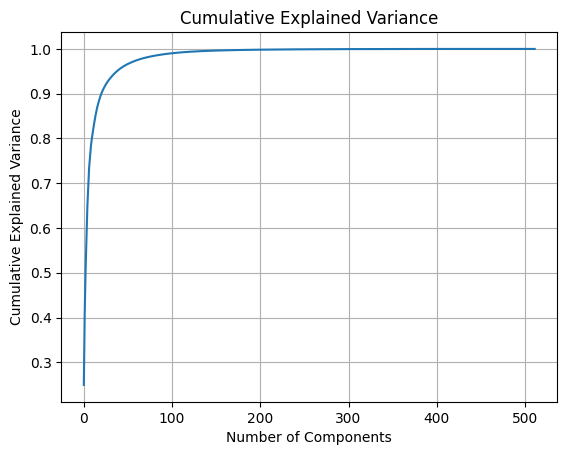

In [116]:
# Plotted cumulative explained variance
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
plt.plot(np.cumsum(explained_variance_ratio))
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


### 4. Choose Top k Principal Components

In [117]:
k = 50  # Number of principal components
components = eigenvectors[:, :k]

# Compressed image
compressed_data = np.dot(centered_data, components)


### 5. Reconstruct Image from Compressed Data

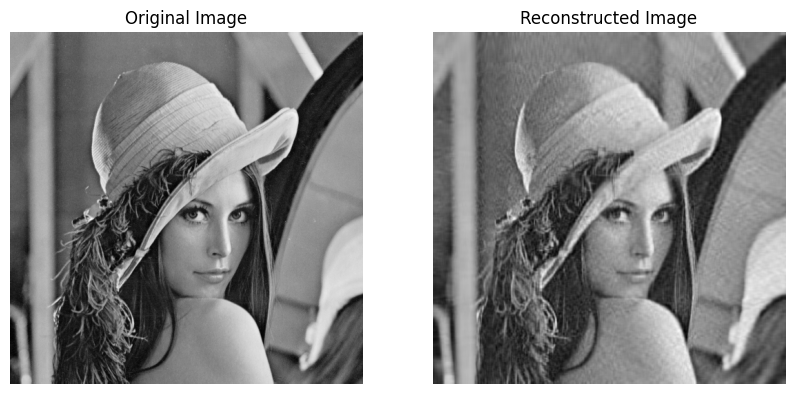

In [118]:
# Decompressed image
decompressed_data = np.dot(compressed_data, components.T) + mean

# Displayed original and reconstructed images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_array, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(decompressed_data, cmap="gray")
axes[1].set_title("Reconstructed Image")
axes[1].axis("off")

plt.show()


### 6. Experiment with Different k-values

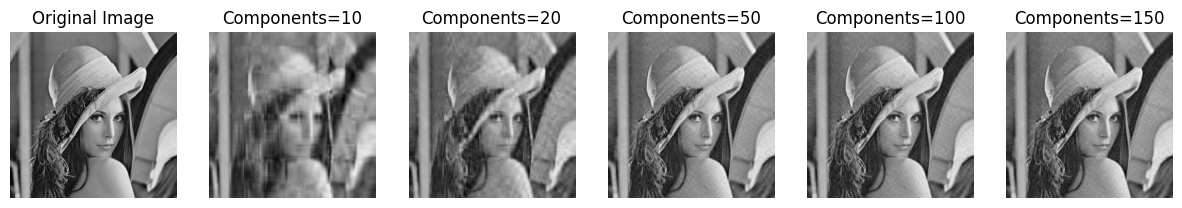

In [119]:
k_values = [10, 20, 50, 100, 150]
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

# Displayed original image
axes[0].imshow(image_array, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

# Loop through the k values to compress and display images
for i, k in enumerate(k_values):
    # Got the first k principal components
    components = pca.components_[:k]
    
    # Compressed the data by projecting onto the first k components
    compressed_data = np.dot(centered_data, components.T)
    
    # Reconstructed the image from the compressed data
    decompressed_data = np.dot(compressed_data, components) + mean

    # Reshaped the decompressed data back to the image shape
    decompressed_image = decompressed_data.reshape(image_array.shape)

    # Displayed the decompressed image in the correct subplot
    axes[i + 1].imshow(decompressed_image, cmap="gray")
    axes[i + 1].set_title(f"Components={k}")
    axes[i + 1].axis("off")

plt.show()
